# Course Introduction and Review

Imports required in the folowing

In [56]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
%matplotlib inline
%qtconsole

## Outline

* What is a regression model?

* Descriptive statistics -- numerical

* Descriptive statistics -- graphical

* Inference about a population mean
  
* Difference between two population means

# What is course about?


* It is a course on applied statistics.

* Hands-on: I use [Python](https://www.python.org/), as on open-source programming language having a lot of statistic packages.

* Course notes will be [jupyter](http://jupyter.org) notebooks.

* We will start out with a review of introductory statistics to see `Python` in action.
 
* Main topic is *(linear) regression models*: these are the *bread and butter* of applied statistics.

## What is a regression model? 

A regression model is a model of the relationships between some 
*covariates (predictors)* and an *outcome*.

Specifically, regression is a model of the *average* outcome *given or having fixed* the [covariates](https://en.wikipedia.org/wiki/Covariate). 

# Heights of mothers and daughters
  
* Heights of mothers and daughters collected by Karl Pearson in the late 19th century.

* One of our goals is to understand height of the daughter, `D`, knowing the height of the
mother, `M`.

* A mathematical  model might look like
  $$
  D = f(M) + \varepsilon$$
  where $f$ gives the average height of the daughter
  of a mother of height `M` and
  $\varepsilon$ is *error*: not *every* daughter has the same height.

* A statistical question: is there *any*
relationship between covariates (height of mothers) and outcomes (height of daughters) -- is $f$ just a constant?

Let's create a plot of the heights of the mother/daughter pairs. The data was scraped from alr3 R package and saved as `01_heights.csv` in the data folder accompanying this notebook.

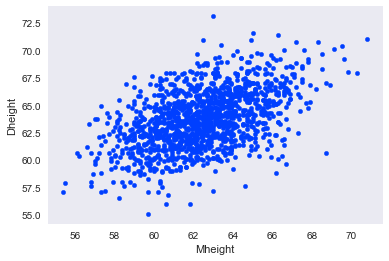

In [58]:
fpath=os.path.join(os.getcwd(),r'data/01_heights.csv')
df=pd.DataFrame.from_csv(fpath)
df.plot.scatter(x='Mheight',y='Dheight')

In the first part of this course we'll talk about fitting a line to this data. Let's do that and remake the plot, including this "best fitting line".

In [59]:
results = smf.ols('Dheight ~ Mheight',data=df).fit()
#results.params.Intercept
#results.params.Mheight

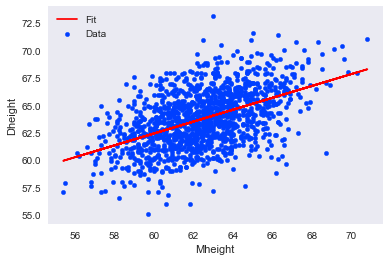

In [60]:
fig, ax = plt.subplots()
df.plot.scatter(x='Mheight',y='Dheight',ax=ax,label='Data')
ax.plot(df.Mheight, df.Mheight*results.params.Mheight+results.params.Intercept, 'r',label='Fit')
# alternatively using numpy.polyval
#ax.plot(df.Mheight, np.polyval(results.params.values[::-1],df.Mheight), 'r',label='Fit')
ax.legend()

# Linear regression model

* How do we find this line? With a model.

* We might model the data as
$$
D = \beta_0+ \beta_1 M + \varepsilon.
$$

* This model is *linear* in $\beta_1$, the coefficient of  $M$ (the mother's height), it is a 
*simple linear regression model*.

* Another model:
$$
D = \beta_0 + \beta_1 M + \beta_2 M^2  + \beta_3 F + \varepsilon
$$
where $F$ is the height of the daughter's father.

* Also linear (in the coefficients of  $M,M^2,F$).

* Which model is better? We will need a tool to compare models... more to come later.

# A more complex model

* Our example here was rather simple: we only had one independent variable.

* Independent variables are sometimes called *features* or *covariates*.

* In practice, we often have many more than one independent variable.

# Right-to-work

This example considers the effect of right-to-work legislation (which varies by state) on various
factors. The corresconding dataset can be found [here](http://www1.aucegypt.edu/faculty/hadi/RABE4/Data4/P005.txt).
Alternatively, the dataset is saved in *01_right_to_work.txt* in the _data_ folder accompanying this notebook.

The variables are:

* Income: income for a four-person family

* COL: cost of living for a four-person family

* PD: Population density

* URate: rate of unionization in 1978

* Pop: Population

* Taxes: Property taxes in 1972

* RTWL: right-to-work indicator
   

In a study like this, there are many possible questions of interest. Our focus will be on the
relationship between `RTWL` and `Income`. However, we should recognize that other variables
have an effect on `Income`. Let's look at some of these relationships.

In [61]:
fpath=os.path.join(os.getcwd(),r'data/01_right_to_work.txt')
df=pd.read_table(fpath)

#or from url
#df=pd.read_table('http://www1.aucegypt.edu/faculty/hadi/RABE4/Data4/P005.txt')

df.head()

,City,COL,PD,URate,Pop,Taxes,Income,RTWL
0,Atlanta,169,414,13.6,1790128,5128,2961,1
1,Austin,143,239,11.0,396891,4303,1711,1
2,Bakersfield,339,43,23.7,349874,4166,2122,0
3,Baltimore,173,951,21.0,2147850,5001,4654,0
4,Baton Rouge,99,255,16.0,411725,3965,1620,1


A graphical way to visualize the relationship between Income and RTWL is the boxplot.

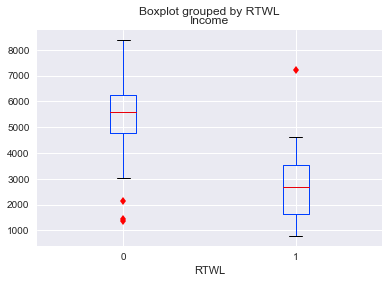

In [62]:
flierprops = dict(marker='d', markerfacecolor='red', linestyle='none')
df.boxplot('Income','RTWL',flierprops=flierprops)

One variable that may have an important effect on the relationship between is the cost of living `COL`. It also varies between right-to-work states.

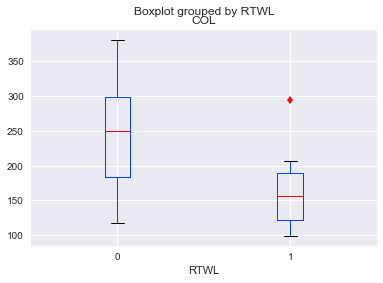

In [63]:
df.boxplot('COL','RTWL',flierprops=flierprops)

We may want to include more than one plot in a given display. For this purpose subplots should be defined first.

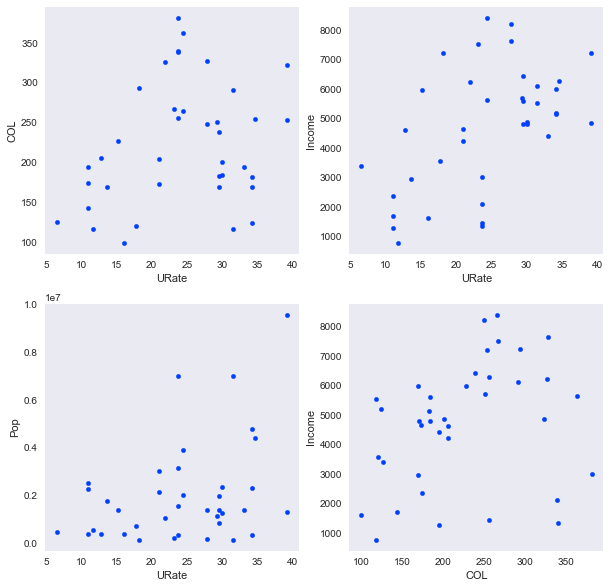

In [64]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)

df.plot.scatter('URate','COL',ax=axs[0,0])
df.plot.scatter('URate','Income',ax=axs[0,1])
df.plot.scatter('URate','Pop',ax=axs[1,0])
df.plot.scatter('COL','Income',ax=axs[1,1])

`seaborn` module has a function `pairplot` that displays pairwise relationships in a given dataset.

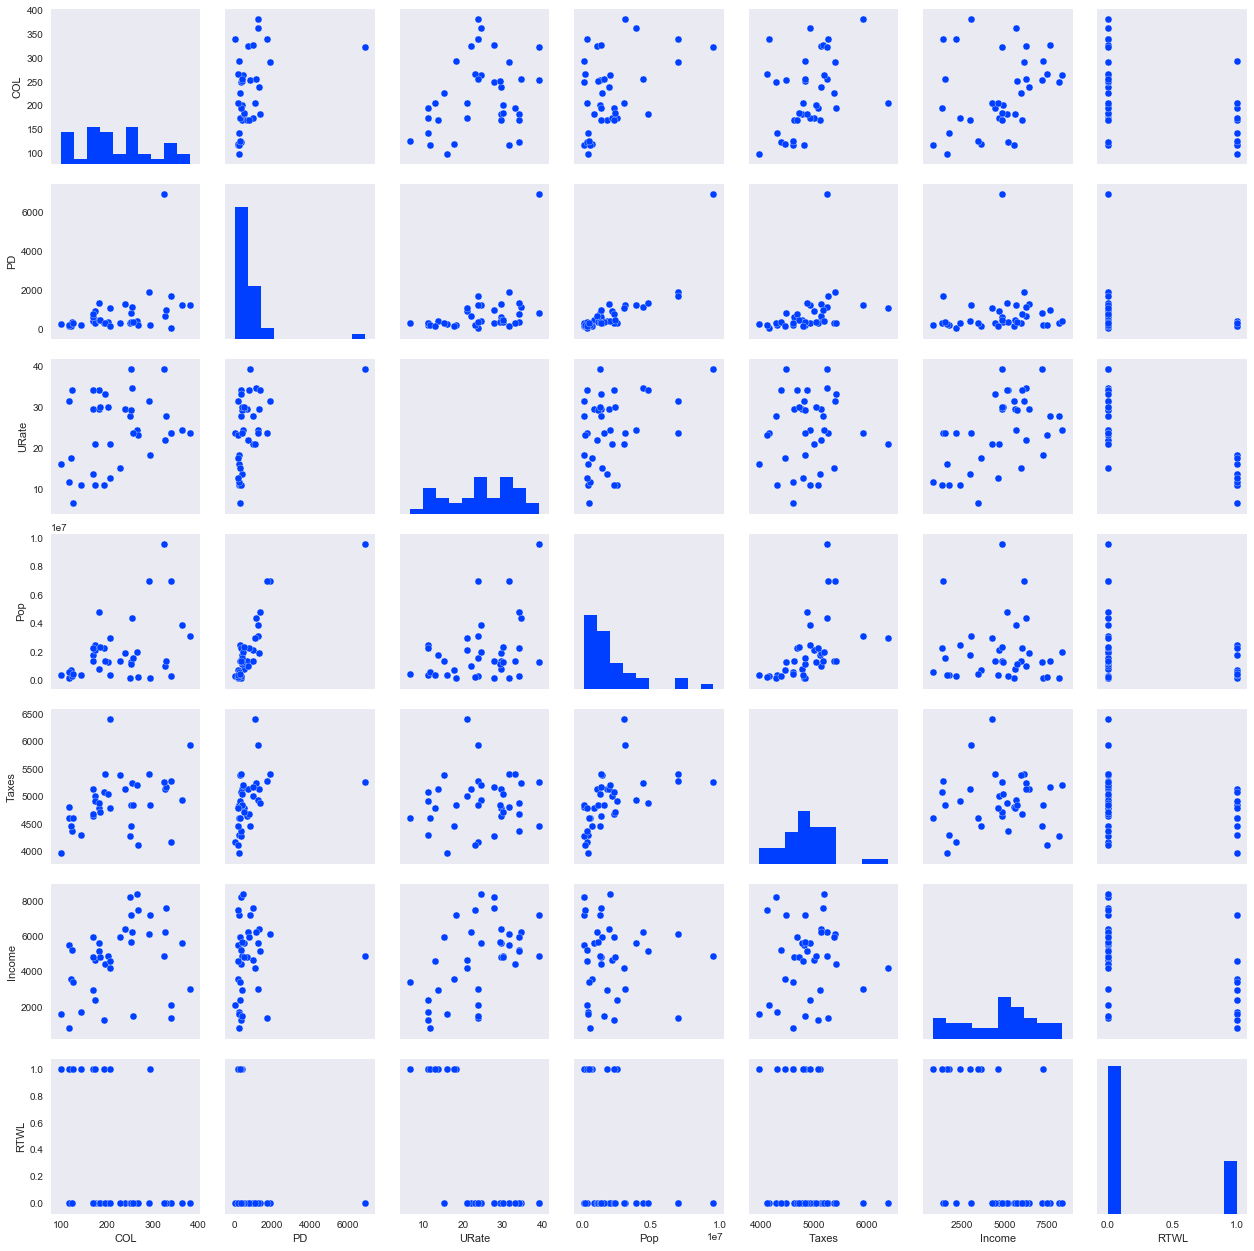

In [65]:
sns.pairplot(df)

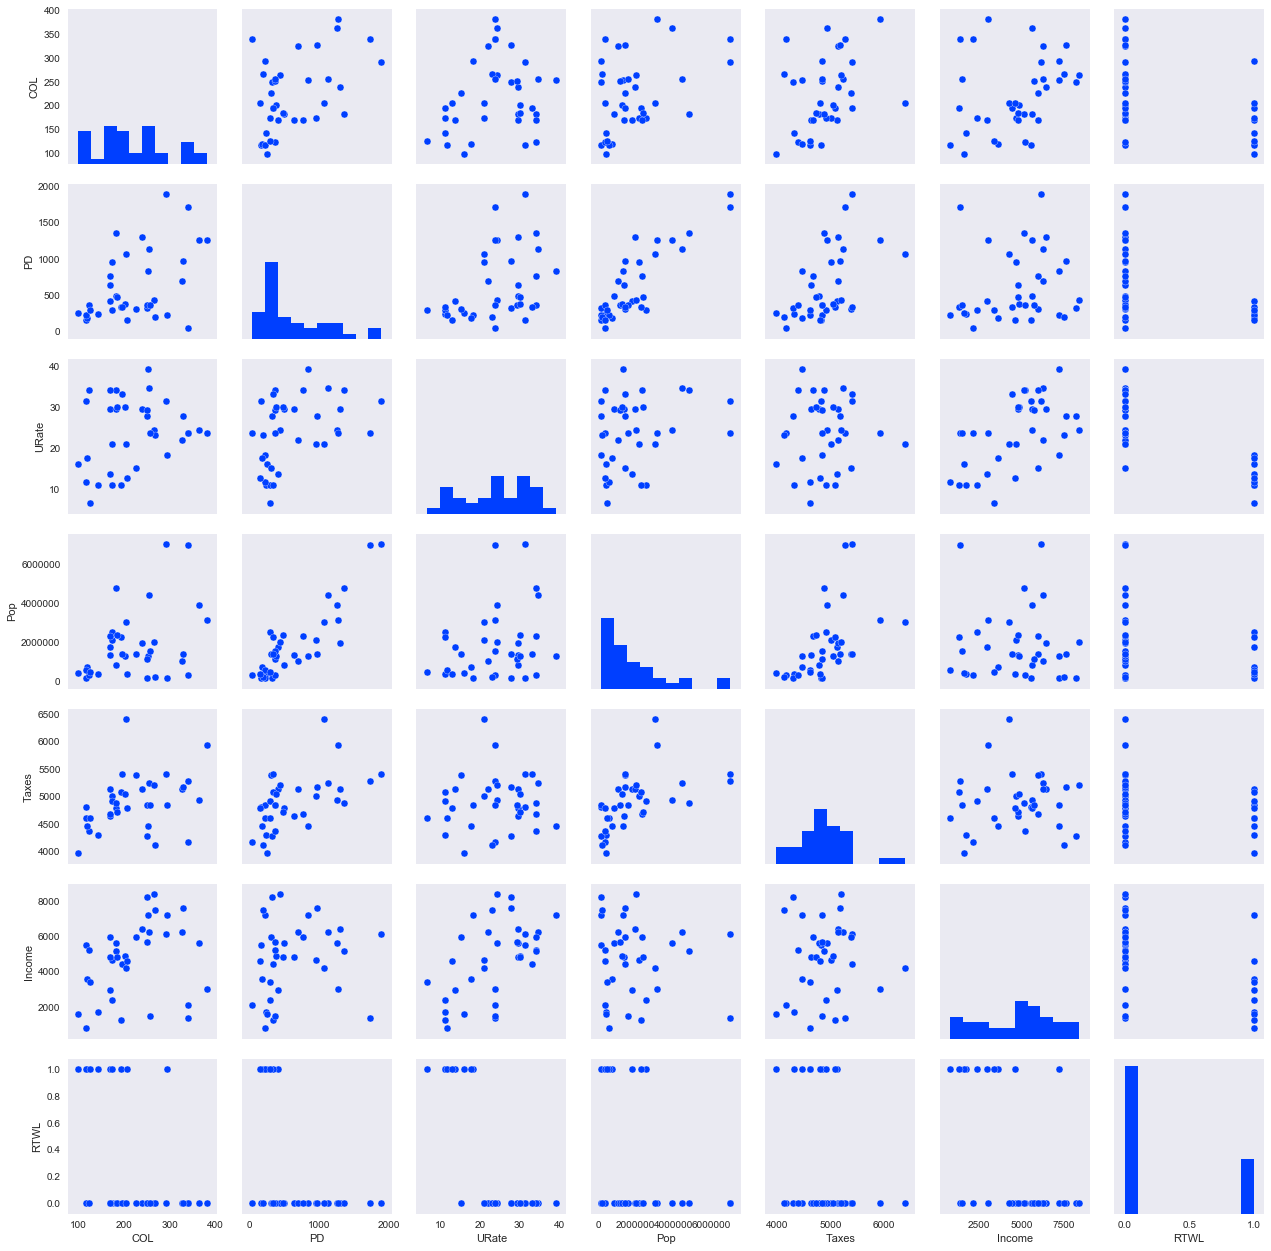

In [66]:
sns.pairplot(df[~(df.City=="New York")])

# Right-to-work example

## Building a model

Some of the main goals of this course:

* Build a statistical model describing the *effect* of `RTWL` on `Income`.

* This model should recognize that other variables also affect `Income`.

* What sort of *statistical confidence* do we have in our 
conclusion about `RTWL` and `Income`?

* Is the model adequate do describe this dataset?

* Are there other (simpler, more complicated) better models?


# Numerical descriptive statistics

## Mean of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample mean, $\overline{X}$ is
$$\overline{X} = \frac1n \sum_{i=1}^n X_i.$$

There are a lot of possibilities to calculate mean in Python depending on the used packages. 
_Pandas_ is one of the most commonly used packages for data analysis. That is why let's stick to it.

In [67]:
s=pd.Series([1,3,5,7,8,12,19])
s.mean()

7.857142857142857

## Standard deviation of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample standard deviation $S_X$ is

$$ S^2_X = \frac{1}{n-1}  \sum_{i=1}^n (X_i-\overline{X})^2. $$

In [68]:
s.std()

6.06708528121402

## Median of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample median is the `middle` of the sample:
if $n$ is even, it is the average of the middle two points.
If $n$ is odd, it is the midpoint.

In [69]:
s.median()

7.0

## Quantiles of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the  $q$-th quantile is a point $x_q$ in the data such that $q \cdot 100\%$ of the data are smaller than $x_q$.

### Example

The $0.5$-quantile is the median: half 
of the data lie to the right of the median

In [70]:
s.quantile([0.25,0.5,0.75])

0.25     4.0
0.50     7.0
0.75    10.0
dtype: float64

# Graphical statistical summaries

Let's load another dataset on [calcium suplementation](http://lib.stat.cmu.edu/DASL/Datafiles/Calcium.html) was downloaded and saved in the `03_calcium.txt` file in the data folder accompanying this note book.

In [71]:
fpath=os.path.join(os.getcwd(), 'data', '01_calcium.txt')
calcium=pd.read_table(fpath)

We've already seen a boxplot. Another common statistical summary is a histogram.

Using `pandas`:

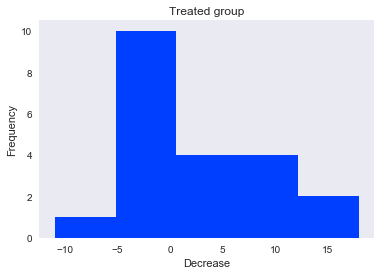

In [72]:
ax=calcium.Decrease.plot.hist(5)
ax.set_xlabel('Decrease')
ax.set_title('Treated group')

or using `seaborn`:

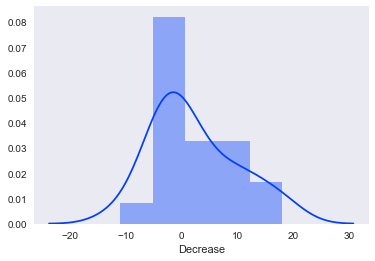

In [73]:
sns.distplot(calcium.Decrease,kde=True)

As a side note, both `pandss.plot` and `seaborn` are based on `matplotlib` library. Therefore, they have similar syntax, which makes them complementary to each other.